**Работу выполнил Трофимов Михаил, ПМ22-1**

In [1]:
#Импортируем необходимые библиотеки и функции
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gmean

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report)
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import (ROCAUC, PrecisionRecallCurve)
from sklearn.datasets import load_breast_cancer

# Методические указания

**Цель работы**

Научиться применять кривые PR и ROC для оценки моделей классификации, использовать их для выбора оптимального порога классификации

**Содержание работы**

1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.
2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).
3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.
4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.
5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [2]:
#Генерируем датасет
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
#Делим выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [4]:
#Создадим и обучим модель логистической регрессии
model = LogisticRegression().fit(X_train, y_train)

In [5]:
#Получим матрицу вероятностей
y_pred_proba = model.predict_proba(X_test)
y_pred_proba[:10]

array([[0.00402732, 0.99597268],
       [0.00200516, 0.99799484],
       [0.99470117, 0.00529883],
       [0.84762581, 0.15237419],
       [0.00166665, 0.99833335],
       [0.49993855, 0.50006145],
       [0.98023686, 0.01976314],
       [0.97653662, 0.02346338],
       [0.0179993 , 0.9820007 ],
       [0.29353482, 0.70646518]])

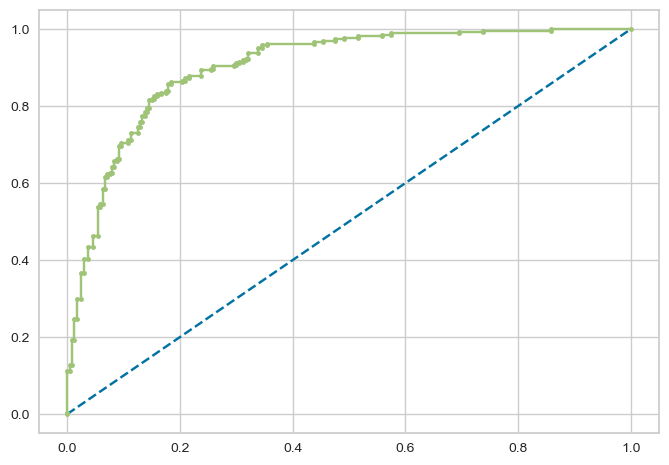

In [6]:
#Строим ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [7]:
#Площадь под графиком
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

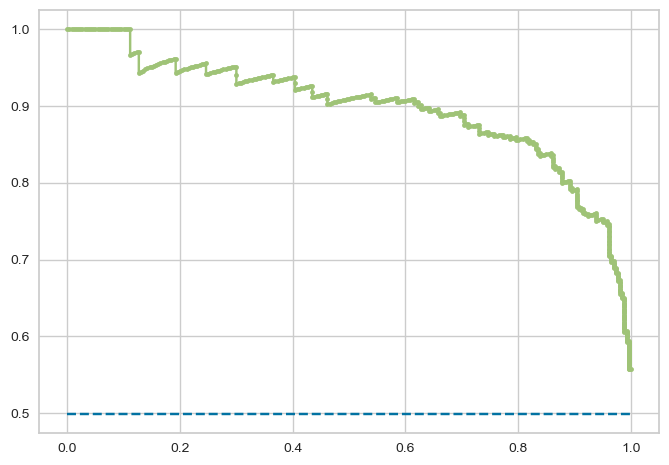

In [8]:
#Построим график PR-кривой
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [9]:
#Площадь под графиком
auc(recall, precision)

0.8977244980325833

In [10]:
#Вызываем отчёт о классификации
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



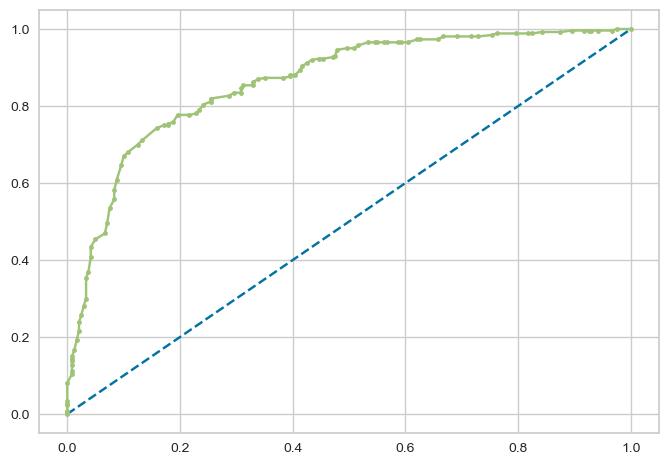

In [11]:
#Обучаем новую модель на тех же данных, выводим график ROC-кривой
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [12]:
#Площадь под графиком
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

**Дисбаланс классов**

In [13]:
#Генерируем несбалансированный по классам датасет
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [14]:
#Делим выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [15]:
#Воспользуемся стратификацией - чтобы в выборках были представлены оба класса
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [16]:
#Обучим модель логистической регрессии
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [17]:
#Получаем отчёт о классификации
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.97      0.98      0.98       500



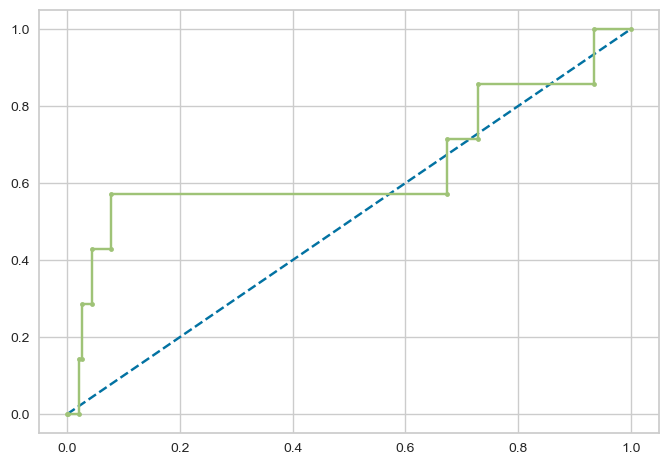

In [18]:
#Строим ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

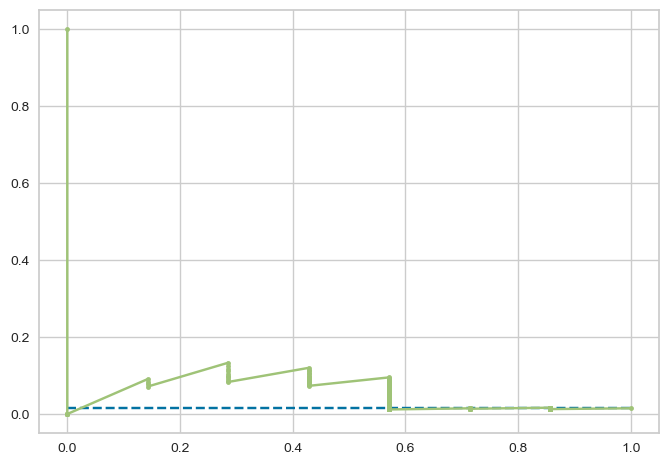

In [19]:
#Строим PR-кривую
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

**Выбор значения порога по кривым**

In [20]:
#Генерируем больший несбалансированный датасет
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

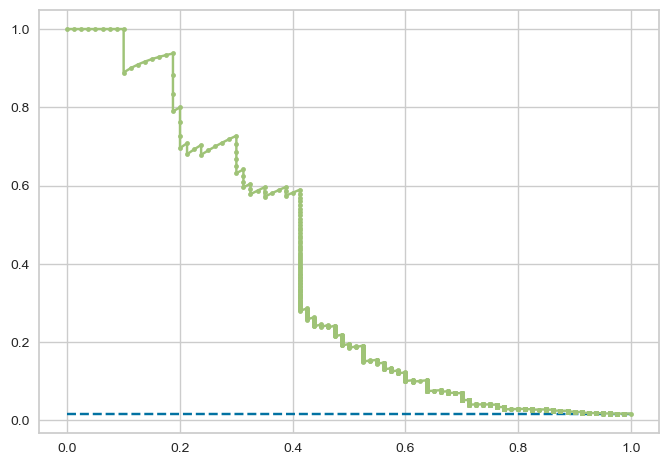

In [21]:
#Изобразим PR-кривую
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [22]:
#Находим порог
f1 = (2 * p * r) / (p + r)
ix = np.argmax(f1)
pr_thresholds[ix]

0.14995567120188752

In [23]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.149956, F-Score=0.485


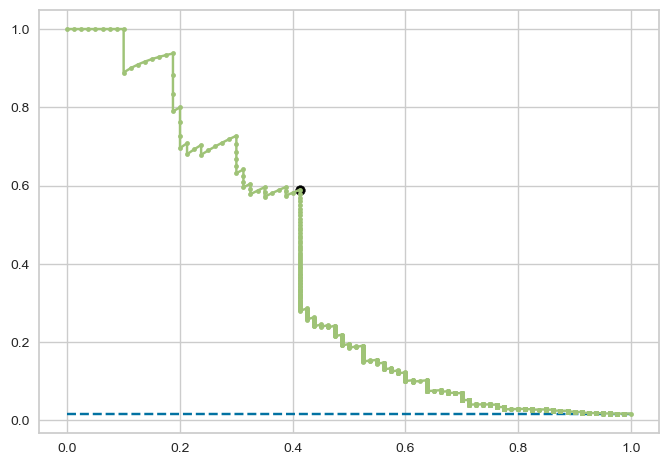

In [24]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [25]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.58      0.40      0.47        80

    accuracy                           0.99      5000
   macro avg       0.79      0.70      0.73      5000
weighted avg       0.98      0.99      0.98      5000



In [26]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       1.00      0.10      0.18        80

    accuracy                           0.99      5000
   macro avg       0.99      0.55      0.59      5000
weighted avg       0.99      0.99      0.98      5000



Модель с новым порогом, по моему мнению, лучше, так как обладает большей полнотой по отношению к меньшему из классов

# Самостоятельная часть

**1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.**

In [27]:
#Генерируем двумерный датасет
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=1)
X.shape, y.shape

((1000, 2), (1000,))

In [28]:
#Делим выборку пополам - чтобы и в обучающей, и в тестовой выборках было достаточно точек
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [29]:
#Обучаем модель логистической регрессии
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

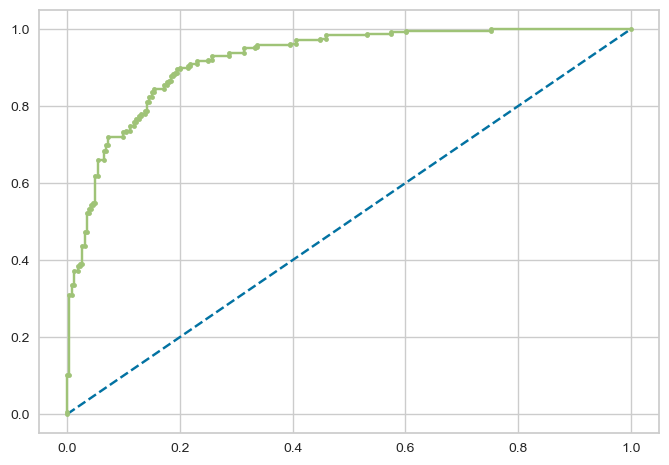

0.9196684781737444

In [30]:
#Построим ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
roc_auc_score(y_test, y_pred_proba[:, 1]) #Площадь под графиком

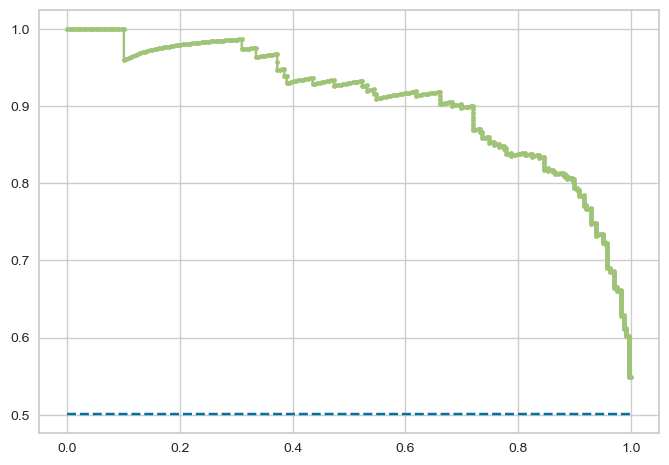

0.9075014294962932

In [31]:
#Построим график PR-кривой
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
auc(recall, precision) #Площадь под графиком

In [32]:
#Получаем отчёт о классификации
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       261
           1       0.81      0.87      0.84       239

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



**2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.**

In [33]:
#Читаем датасет, делим его на обучающую и тестовую выборки
data = load_breast_cancer() #Датасет рака груди
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [34]:
#Обучаем модель логистической регрессии
model = LogisticRegression(max_iter=5000).fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

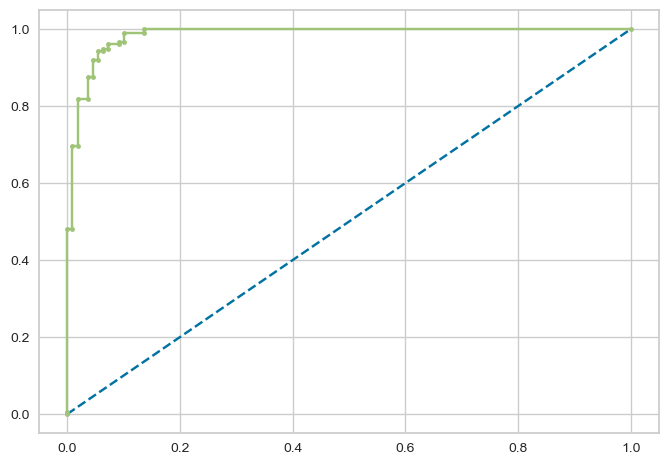

0.9848831168831169

In [35]:
#Построим ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
roc_auc_score(y_test, y_pred_proba[:, 1]) #Площадь под графиком

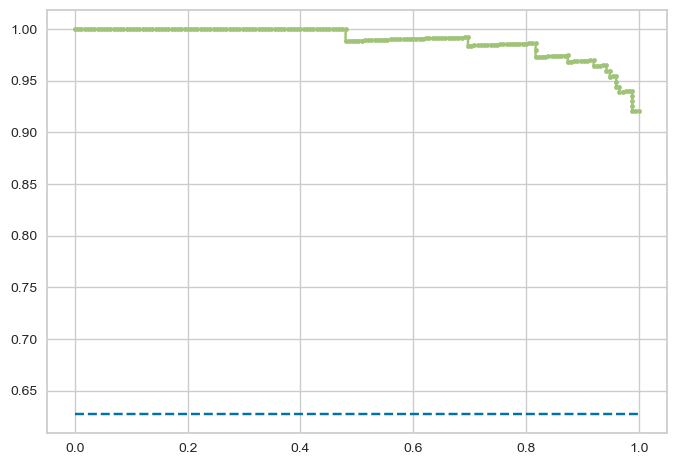

0.9890101694722894

In [36]:
#Построим график PR-кривой
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
auc(recall, precision) #Площадь под графиком

In [37]:
#Получаем отчёт о классификации
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.95      0.95      0.95       175

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



AUC близки к 1, precisiion и recall на высоком уровне - модель хорошо различает классы (которые, кстати, несбалансированы)

**3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.**

In [38]:
#Генерируем несбалансированный по классам датасет
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.7, 0.3], random_state=1)

In [39]:
#Воспользуемся стратификацией - чтобы в выборках были представлены оба класса
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=698, Class1=302
Обучающая: Class0=349, Class1=151
Тестовая: Class0=349, Class1=151


In [40]:
#Обучим модель логистической регрессии
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

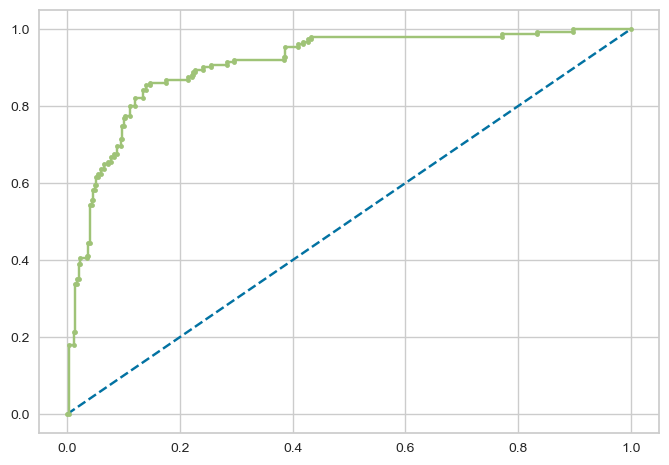

0.9079299417446252

In [41]:
#Построим ROC-кривую
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
roc_auc_score(y_test, y_pred_proba[:, 1]) #Площадь под графиком

In [42]:
#Находим порог
ix = np.argmax(np.sqrt(fpr*(1-tpr)))
roc_thresholds[ix], fpr[ix], tpr[ix]

(0.08295359934168857, 0.3839541547277937, 0.9205298013245033)

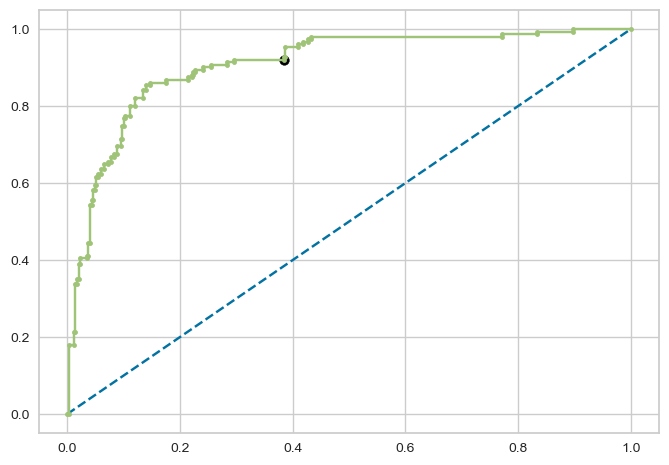

0.9079299417446252

In [43]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black')
plt.show()
roc_auc_score(y_test, y_pred_proba[:, 1])

In [44]:
y_pred = (y_pred_proba[:, 1] > roc_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       349
           1       0.51      0.92      0.66       151

    accuracy                           0.71       500
   macro avg       0.73      0.77      0.70       500
weighted avg       0.82      0.71      0.72       500



In [45]:
#Получаем отчёт о классификации
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       349
           1       0.76      0.77      0.77       151

    accuracy                           0.86       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.86      0.86      0.86       500



**4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.**

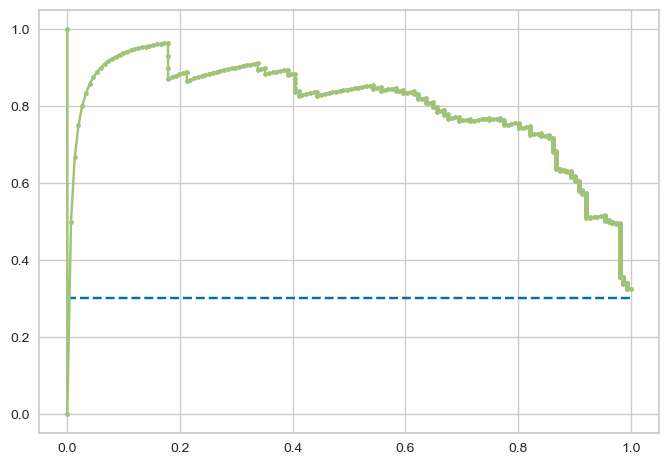

In [46]:
#Изобразим PR-кривую
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [47]:
#Находим порог (преимущество precision)
f1_n = (1 + 2**2)*p*r/(2**2*p+r)
ix_p = np.argmax(f1_n)
pr_thresholds[ix_p], p[ix_p], r[ix_p]

/var/folders/fn/372dbz5d1fs8nt0y37jrcynr0000gn/T/ipykernel_1195/3669351419.py:2: RuntimeWarning: invalid value encountered in true_divide
  f1_n = (1 + 2**2)*p*r/(2**2*p+r)


(0.9994977363403525, 0.0, 0.0)

In [48]:
#Находим порог (превалирование recall)
f1_n = (1 + 0.5**2)*p*r/(0.5**2*p+r)
ix_r = np.argmax(f1_n)
pr_thresholds[ix_r], p[ix_r], r[ix_r]

/var/folders/fn/372dbz5d1fs8nt0y37jrcynr0000gn/T/ipykernel_1195/1139274326.py:2: RuntimeWarning: invalid value encountered in true_divide
  f1_n = (1 + 0.5**2)*p*r/(0.5**2*p+r)


(0.9994977363403525, 0.0, 0.0)

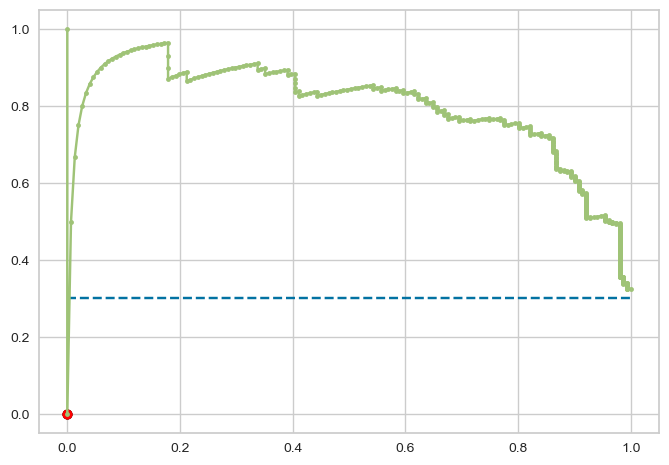

In [49]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix_p], p[ix_p], marker='o', color='black')
plt.scatter(r[ix_r], p[ix_r], marker='o', color='red')
plt.show()

In [50]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix_p]).astype('int')
print(classification_report(y_test, y_pred)) #Преимущество p "работает" на рост recall у меньшего класса

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       349
           1       0.00      0.00      0.00       151

    accuracy                           0.70       500
   macro avg       0.35      0.50      0.41       500
weighted avg       0.49      0.70      0.57       500



/Users/trofimovmikhail/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trofimovmikhail/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trofimovmikhail/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [51]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix_r]).astype('int')
print(classification_report(y_test, y_pred)) #Превалирование r "работает" на рост precision у меньшего класса

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       349
           1       0.00      0.00      0.00       151

    accuracy                           0.70       500
   macro avg       0.35      0.50      0.41       500
weighted avg       0.49      0.70      0.57       500



/Users/trofimovmikhail/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trofimovmikhail/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/trofimovmikhail/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

**5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.**

In [52]:
#Генерируем датасет из 4 классов, делим его по выборкам, обучаем модель логистической регрессии
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

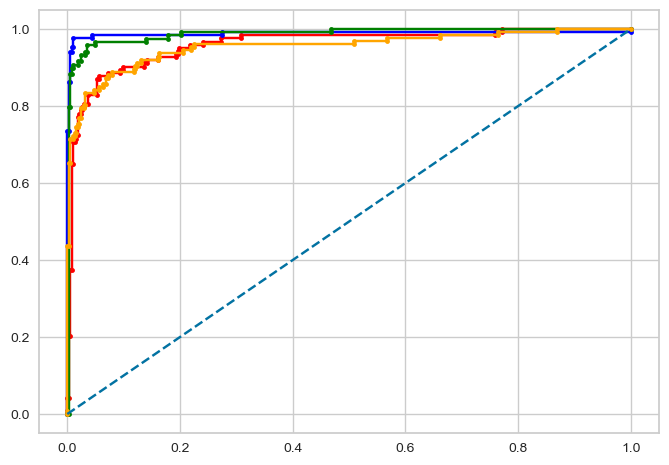

red - 0.9590045502577041
blue - 0.9888833992094862
green - 0.9871413132182008
orange - 0.9543120278414396


In [53]:
#Построим ROC-кривую
colour = ['red', 'blue', 'green', 'orange']
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test==i, y_pred_proba[:, i])
    plt.plot(fpr, tpr, marker='.', color = colour[i])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()
for i in range(4): #Площадь под графиком
    print(colour[i], '-', roc_auc_score(y_test==i, y_pred_proba[:, i]))

red - 0.8959006728658688
blue - 0.9867690916045877
green - 0.9389430658856643
orange - 0.9250887988182471


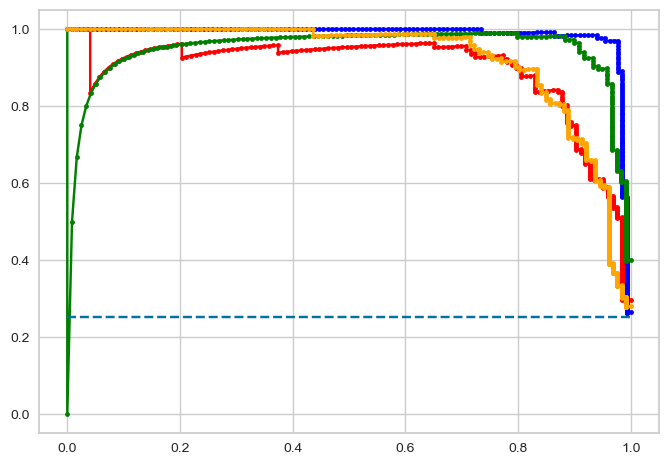

In [54]:
#Изобразим PR-кривую
colour = ['red', 'blue', 'green', 'orange']
for i in range(4):
    p, r, pr_thresholds = precision_recall_curve(y_test==i, y_pred_proba[:, i])
    plt.plot(r, p, marker='.', color = colour[i])
    print(colour[i], '-', auc(r, p))
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.show()

In [55]:
#Получаем отчёт о классификации
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.85       123
           1       0.92      0.98      0.95       132
           2       0.96      0.89      0.93       119
           3       0.88      0.83      0.85       126

    accuracy                           0.90       500
   macro avg       0.90      0.89      0.90       500
weighted avg       0.90      0.90      0.90       500



**6. Используйте для построения кривых библиотеку yellowbrick.**

In [56]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

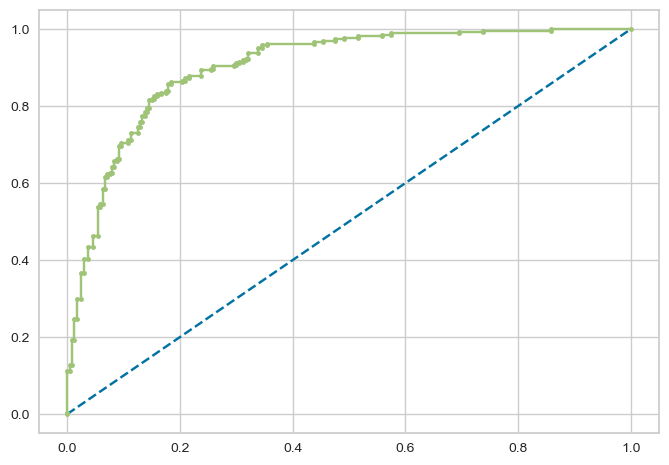

0.9028205128205128

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()
roc_auc_score(y_test, y_pred_proba[:, 1])

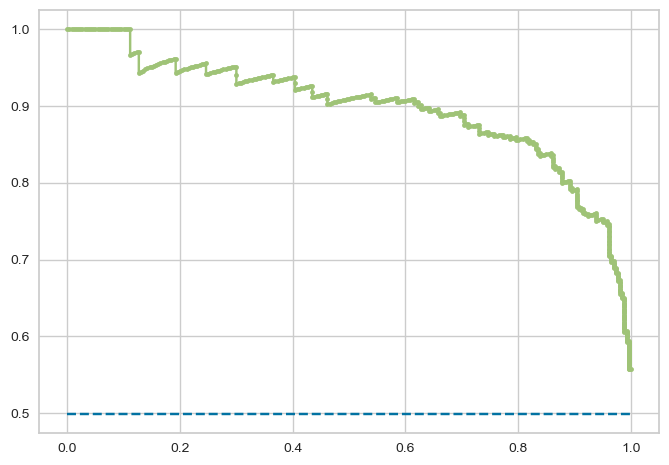

0.8977244980325833

In [58]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
auc(recall, precision)

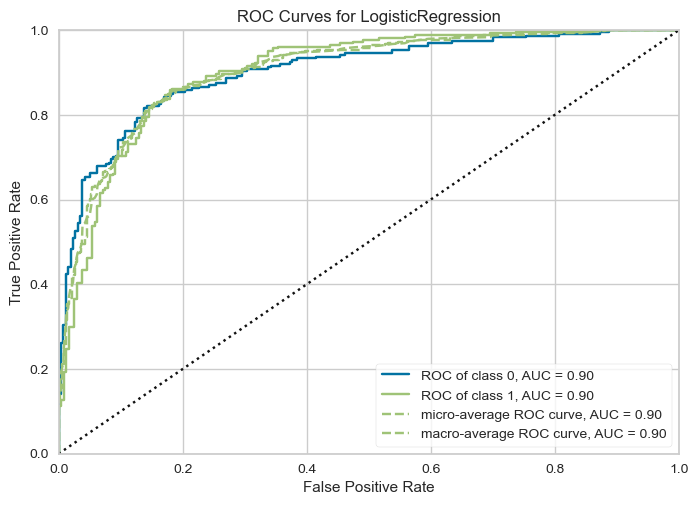

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [59]:
visualizer = ROCAUC(model, classes=model.classes_)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

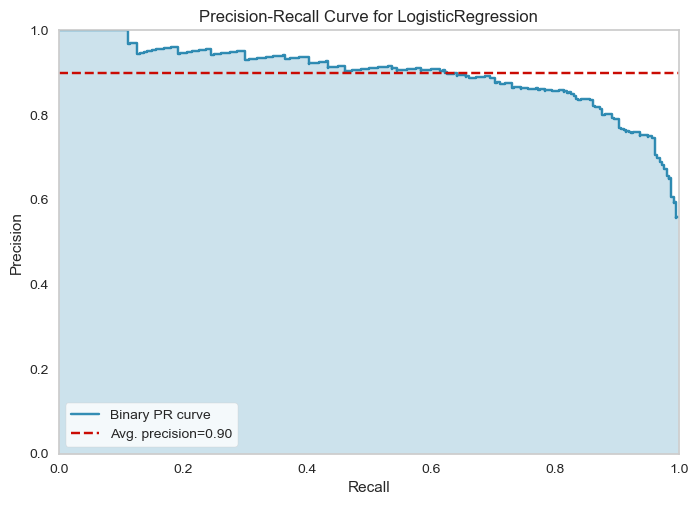

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [60]:
viz = PrecisionRecallCurve(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()